# [How to Tell Someone’s Age When All You Know Is Her Name](http://fivethirtyeight.com/features/how-to-tell-someones-age-when-all-you-know-is-her-name/)

This is code that reproduce some of the diagrams in a FiveThirthyEight article that estimates someone's age given only a name using data from [Social Security Administration](http://www.ssa.gov/oact/babynames/).

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%bash
# Uncomment only on first run
make popularnames

make: Nothing to be done for `popularnames'.


In [3]:
%%time
dfs = []

for year in range(1900, 2015):
    df = pd.read_csv('popularnames/{}.csv'.format(year))
    df['Year'] = year
    dfs.append(df)
    
popular_names = pd.concat(dfs)

CPU times: user 461 ms, sys: 61.5 ms, total: 523 ms
Wall time: 638 ms


In [4]:
pop_male_names = popular_names.pivot(index='Year', columns='Male name', values='Number of males')
pop_female_names = popular_names.pivot(index='Year', columns='Female name', values='Number of females')

## Age Distribution By Year of Birth

### Joseph

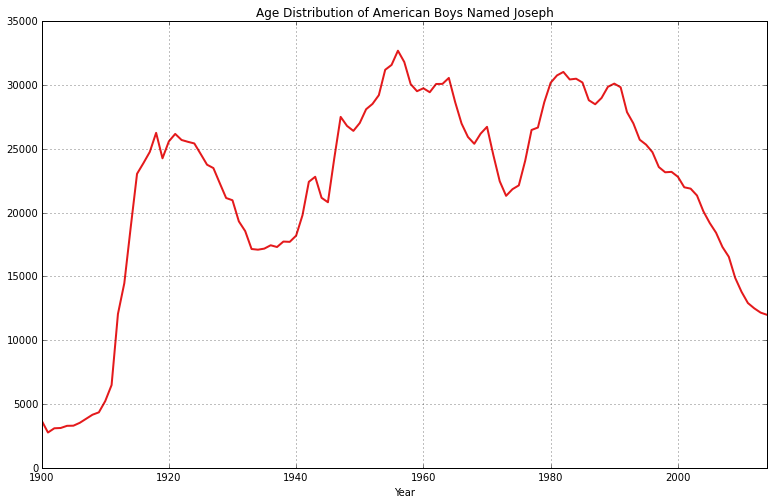

In [5]:
name = 'Joseph'
pop_male_names[name] \
    .interpolate() \
    .plot(title='Age Distribution of American Boys Named {}'.format(name),
          linewidth=2, cmap='Set1', figsize=(13, 8))

Apparently, the peak year for Josephs was not 1914, but 1956.

In [6]:
(pop_male_names[name].argmax(),
 pop_male_names[name].max())

(1956, 32702.0)

### Brittany

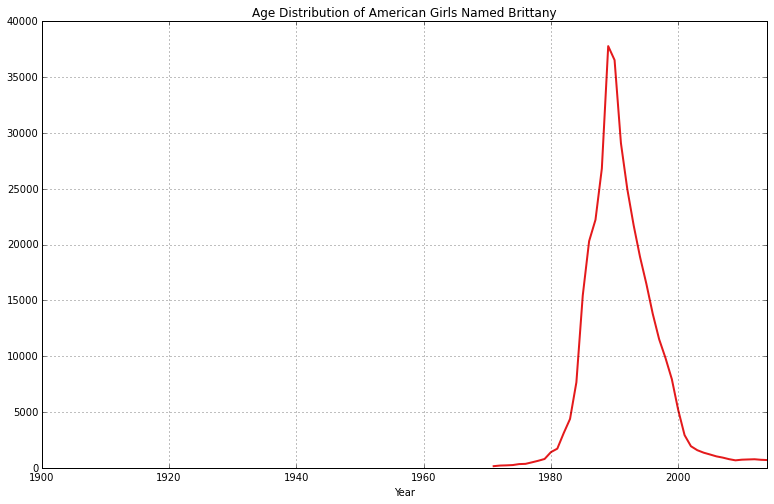

In [7]:
name = 'Brittany'
pop_female_names[name] \
    .interpolate() \
    .plot(title='Age Distribution of American Girls Named {}'.format(name),
          linewidth=2, cmap='Set1', figsize=(13, 8))

In [8]:
(pop_female_names[name].argmax(),
 pop_female_names[name].max())

(1989, 37786.0)

## Cohort Life Tables for the Social Security Area by Calendar Year

In [9]:
%%time
%%bash
make LifeTables

make: Nothing to be done for `LifeTables'.
CPU times: user 2.44 ms, sys: 8.84 ms, total: 11.3 ms
Wall time: 41.7 ms


In [10]:
columns = ['x', 'q_x', 'l_x', 'd_x', 'L_x', 'T_x', 'Life Expectancy']
index = 'x'

male_life_tables = []
female_life_tables = []

for decade in range(1900, 2110, 10):
    df = pd.read_csv('LifeTables/LifeTables_Tbl_7_{}.csv'.format(decade))

    male_life_table = df[df.columns[1:8]].copy()
    male_life_table.columns = columns
    male_life_table['Year of Birth'] = decade
    male_life_tables.append(male_life_table)

    female_life_table = df[df.columns[9:16]].copy()
    female_life_table.columns = columns
    female_life_table['Year of Birth'] = decade
    female_life_tables.append(female_life_table)
    
male_life_table = pd.concat(male_life_tables)
female_life_table = pd.concat(female_life_tables)

In [11]:
# life_table['l_x'] is the number of people
num_females_alive = female_life_table[female_life_table['x'] == (2014 - female_life_table['Year of Birth'])] \
    .set_index('Year of Birth')['l_x'] / 100000.
    
num_males_alive = male_life_table[male_life_table['x'] == (2014 - male_life_table['Year of Birth'])] \
    .set_index('Year of Birth')['l_x'] / 100000.

In [12]:
def age_dist_females(name):
    # Number of births
    births = pop_female_names[name].fillna(0)

    # Number of people estimated to be alive 1 jan 2014
    x = num_females_alive.reindex(range(1900, 2015)).interpolate() * births
    fill_between(x.index, x.values, 0, color='none', edgecolor='red', hatch='||', linewidth=0)

    # Find mean age for the people alive
    mean_age = int(np.nanmean([age for year, n in x.iteritems() for age in [2014 - year] * n]))
    mean_age_x = 2014 - mean_age
    mean_age_y = x.ix[mean_age_x]
    bar(mean_age_x, mean_age_y, width=0, linewidth=3, edgecolor='red')

#    annotate(str(mean_age), xy=(mean_age_x, mean_age_y), xytext=(mean_age_x * 1.01, mean_age_y * 1.01), arrowprops=dict(arrowstyle="->"))
    annotate('The median living {}\nis {} years old'.format(name, mean_age),
             xy=(mean_age_x, mean_age_y),
             xytext=(-100, 100),
             xycoords='data',
             textcoords='offset points',
             size=13, va='center',
             arrowprops=dict(arrowstyle='wedge,tail_width=0.7',
                             fc="0.6", ec="none",
                             connectionstyle='arc3,rad=0.3'))
    
    births \
        .plot(title='Age Distribution of American Girls Named {}'.format(name),
              linewidth=3, color='black', figsize=(13, 8))
    tight_layout()

In [13]:
def age_dist_males(name):
    # Number of births
    births = pop_male_names[name].fillna(0)

    # Number of people estimated to be alive 1 jan 2014
    x = num_males_alive.reindex(range(1900, 2015)).interpolate() * births
    fill_between(x.index, x.values, 0, color='none', edgecolor='red', hatch='||', linewidth=0)

    # Find mean age for the people alive
    mean_age = int(np.nanmean([age for year, n in x.iteritems() for age in [2014 - year] * n]))
    mean_age_x = 2014 - mean_age
    mean_age_y = x.ix[mean_age_x]
    bar(mean_age_x, mean_age_y, width=0, linewidth=3, edgecolor='red')
    
    annotate('The median living {}\nis {} years old'.format(name, mean_age),
             xy=(mean_age_x, mean_age_y),
             xytext=(-100, 100),
             xycoords='data',
             textcoords='offset points',
             size=13, va='center',
             arrowprops=dict(arrowstyle='wedge,tail_width=0.7',
                             fc="0.6", ec="none",
                             connectionstyle='arc3,rad=0.3'))
    
    births \
        .plot(title='Age Distribution of American Boys Named {}'.format(name),
              linewidth=3, color='black', figsize=(13, 8))
    tight_layout()

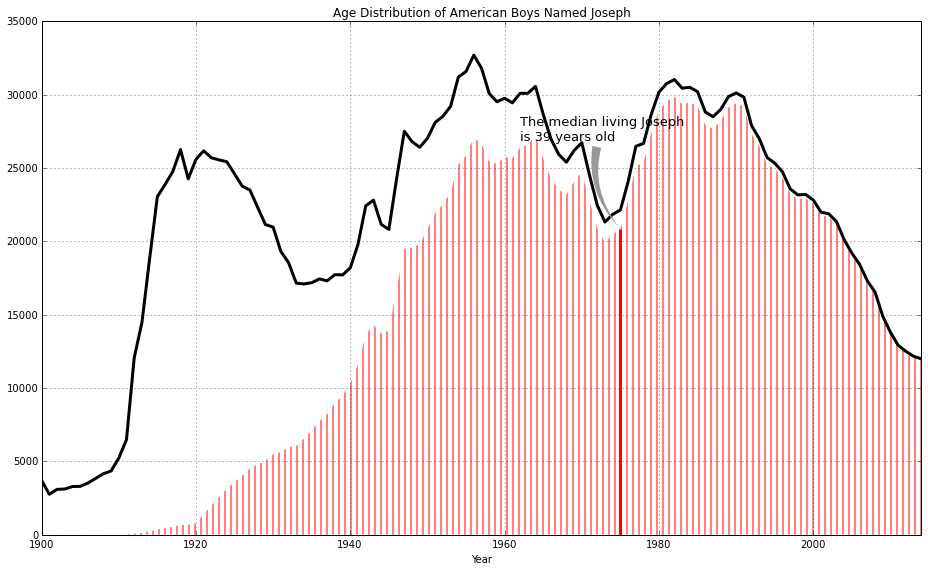

In [14]:
age_dist_males('Joseph')

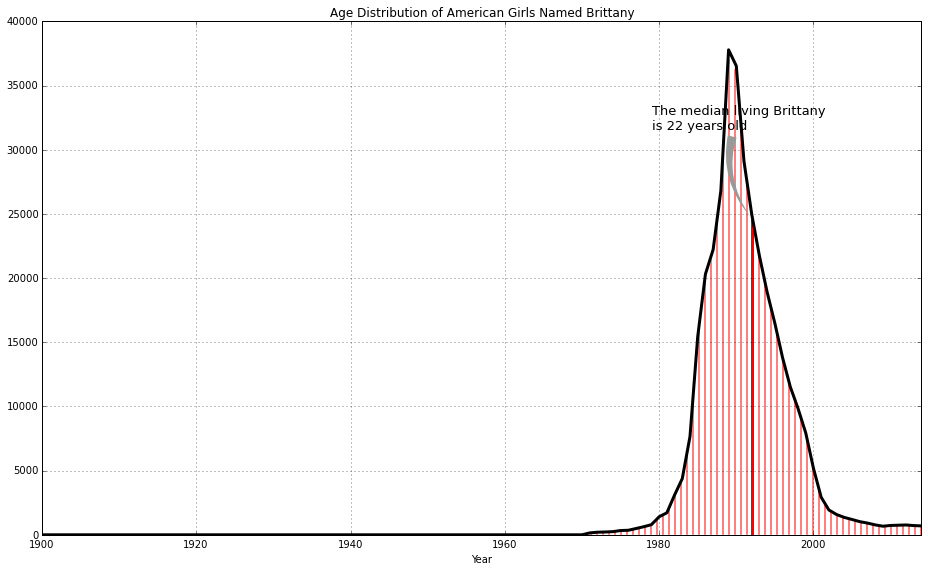

In [15]:
age_dist_females('Brittany')

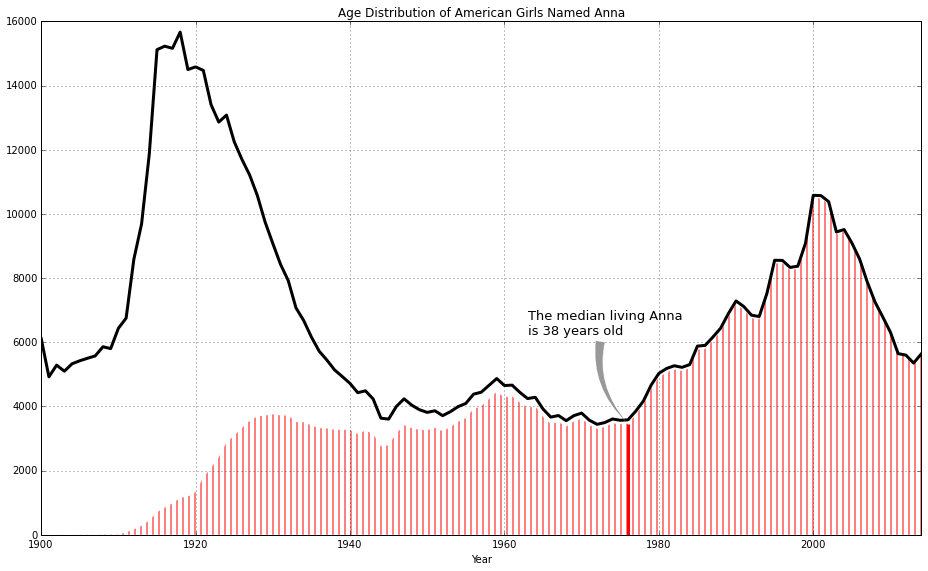

In [16]:
age_dist_females('Anna')

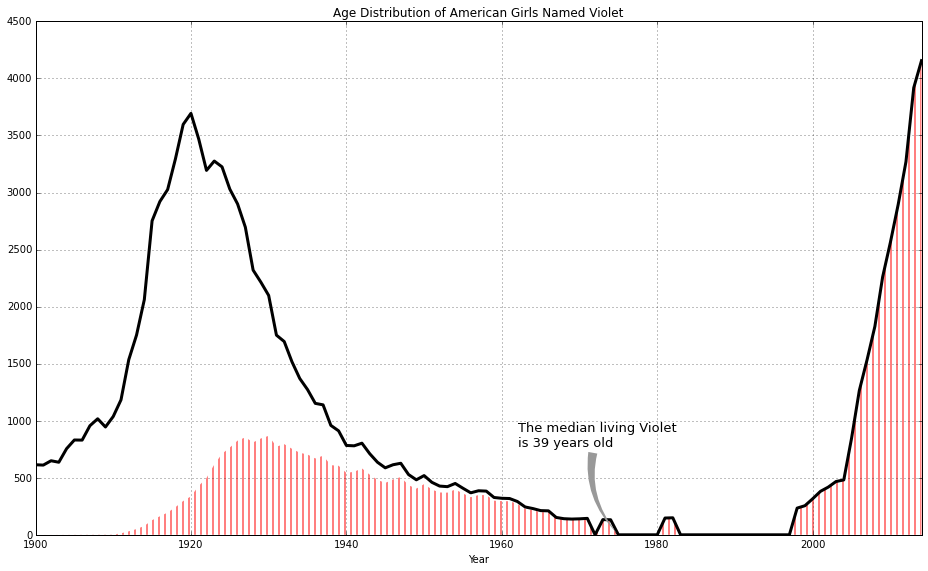

In [17]:
age_dist_females('Violet')

## Median Ages

## Youngest Names

## Oldest Names

## Names With the Widest Age Spread

## Deadest Names